# Assignment 2
## Bar code detector

Use a combination of image thresholding, edge detection and morphological operations to detect a bar code in an image. The workflow for this project is as follows:

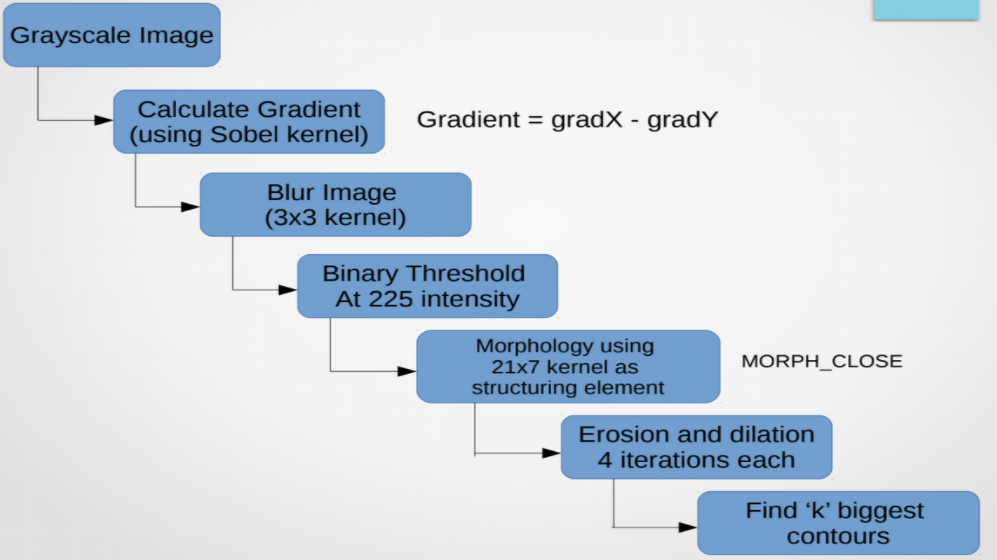

## Comments
Note that this method is one of many valid approaches to detecting bar codes in an image. There is even a Python Library, pyzbar which will automatically find and read barcodes. \
The purpose of this assignment is primarily to show how morphological processing can be used to identify features of interest in an image

Also, for the purposes of this assignment, assume only 1 bar code per image


## Submission Details
Assignment deadline: Midnight, Sunday 03 November \
Jupyter Notebook containing submission to be submitted via Canvas \
Total grade: 15% of final module mark \
Submit the assignment as a notebook (i.e. .iynb file) \
Use the following format for your filename: firstname_lastname_assignment2.ipynb

# Submission details:
#### Name:
#### ID:
#### Class code:

In [1]:
# Load in required libraries
%matplotlib inline
import os
import os.path as op
import numpy as np
import cv2
import matplotlib.pylab as plt

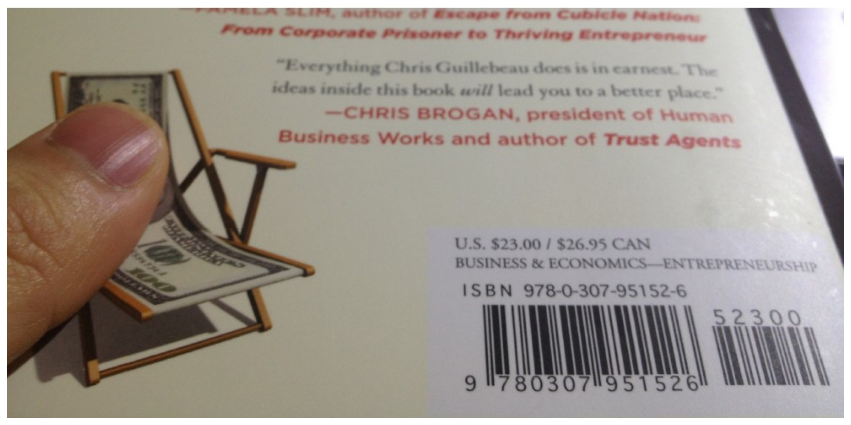

In [2]:
# read in and display image. Note that there are 4 bar code images provided
img = cv2.imread('bar_code1.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # convert bgr to rgb

# display image
plt.figure(figsize=(15,15))
plt.imshow(img)
plt.axis('off')
plt.show()

## Convert image to greyscale
Use open cv cvtColor function to do this

In [4]:
# convert to greyscale using opencv cvtColor


# display the greyscale image


## Calculate the image gradients

In this step, you need to find the image gradients (i.e. the edges of the image).
There are a number of ways to do this.

Example gradient functions are cv2.Sobel or cv2.Laplacian. If you use Sobel, it is recommended to try calculating both horizontal and vertical gradients, and use cv2.subtract to subtract x and y gradients. This is done by setting dx and dy parameters. 

experiment with differenct ksize parameters (size of filtering kernel)
For ddepth, set this to ddepth = cv2.CV_8UC1

for whichever gradient detector used, once you have calculated the gradients, scale and convert the image using cv2.convertScaleAbs function

When you plot the image, you should have something that looks like this:

![Gradient Image](<gradient image.PNG>)

In [3]:
#calculate x & y gradient using Sobel edge detector


# subtract the y-gradient from the x-gradient


# scale the image using convertScaleAbs function



# Alternative - Laplacian


# display the gradient image


## Blur the image
This reduces noise and also removes some smaller gradients, and keeps only large gradients

Experiment with different blurring kernels, but the default cv2.blur with a kernel size of 3*3 is a good place to start...

In [5]:
# blur the image


# display the gradient image


## Convert to binary image
For this project, use manual thresholding use cv2.threshold.
Experiment with manual thresholding (approx 225 works well) to get a result where the bar code is clearly visible. 

Alternatively, you could try using Otsu's method for automatic thresholding

Your end result should look like this:

![Threshold Image](<threshold image.PNG>)

In [6]:
# threshold the image


# display the thresholded image


## Perform erosion and dilation to clean up image

The purpose of this step is slightly counterintuitive - it is to define a box shaped area where the bar code is

To do this, perform the following steps:
- Define a structuring element with the function cv2.getStructuringElement. A rectangular structuring element should work well for this application...
- Perform morphological closing using the opencv morphologyEx function
- perform an additional set of erosions using opencv erode function. Experiment with the number of iterations. 4 works well..
- perform an additional set of dilations  using opencv dilate function. Experiment with the number of iterations. 4 works well..

After these operations, you should have an image that looks something like this example below. Note that the barcode is now a solid rectangle. This is the shape we wnat to find in the next step...

![Morphed Image](<morphed image.PNG>)

In [7]:
# construct a closing kernel and apply it to the thresholded image


# perform a series of erosions and dilations


# display the thresholded image


## Find the barcode

Use the opencv findContours function to find counters in your processed image. Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.

Once you have found all of the contours in the image, use the sorted function to arrange the counters by size(hint: set key = cv2.contourArea)\

Define a box around the largest contour using the opencv minAreaRect function\

Use the opencv drawContours function to draw the box around the largest contour (i.e. the barcode area)

Finally, display the output image. Your result should look something like the example below:

![Barcode Found Image](<barcode found.JPG>)



In [8]:
# Find the countours in the image using the cv2.findContours function


# sort the contours by size using cv2.contourArea


# compute the rotated bounding box of the largest contour



# draw a bounding box arounded the detected barcode and display the
# image


# display the thresholded image


## Suggested improvements

This process works reasonably well for many images, but will not always find the correct answer. Suggest ways to improve the performance of this algorithm. Note: stating "use deep learning", or any variation of this statement, is not allowed!!!